In [3]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd



import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def compTrade(dt):
    d=0.001
    dt['reg']=np.where(dt['dmacd']>d,1,0)
    dt['reg']=np.where(dt['dmacd']<-d,-1,dt['reg'])
    dt['strategy']=dt['reg'].shift(1)*dt['market']
    return dt

def macd(name):
    serdate='2015-1-1'
    sdate='2015-01-02'

    DT = web.DataReader(name, data_source='yahoo',
                 start=serdate)


    DT['CloseN'] = DT['Close']/DT['Close'][sdate]

    
    DT['Date'] = pd.to_datetime( DT.index)
    tempds = DT.sort('Date',ascending = True )
    cs = tempds['Close']
    macd=pd.ewma(cs,span=12)-pd.ewma(cs,span=26)
    signal=pd.ewma(macd,span=9)
    
    DT['macd'] = macd
    DT['signal'] = signal
    DT['dmacd'] = macd-signal
    DT['market']=np.log(cs/cs.shift(1))
    return compTrade(DT)


def plotMacd(DT):
    fig, axs = plt.subplots(4,1,figsize=(24, 10))
    
    DT['CloseN'].plot(ax=axs[0], grid=True)
    DT['macd'].plot(ax=axs[1], grid=True)
    DT['signal'].plot(ax=axs[1], grid=True)
    DT['dmacd'].plot(ax=axs[2], grid=True)
    DT['reg'].plot(ax=axs[2], grid=True)
    DT[['market','strategy']].cumsum().apply(np.exp).plot(ax=axs[3], grid=True)

    
    

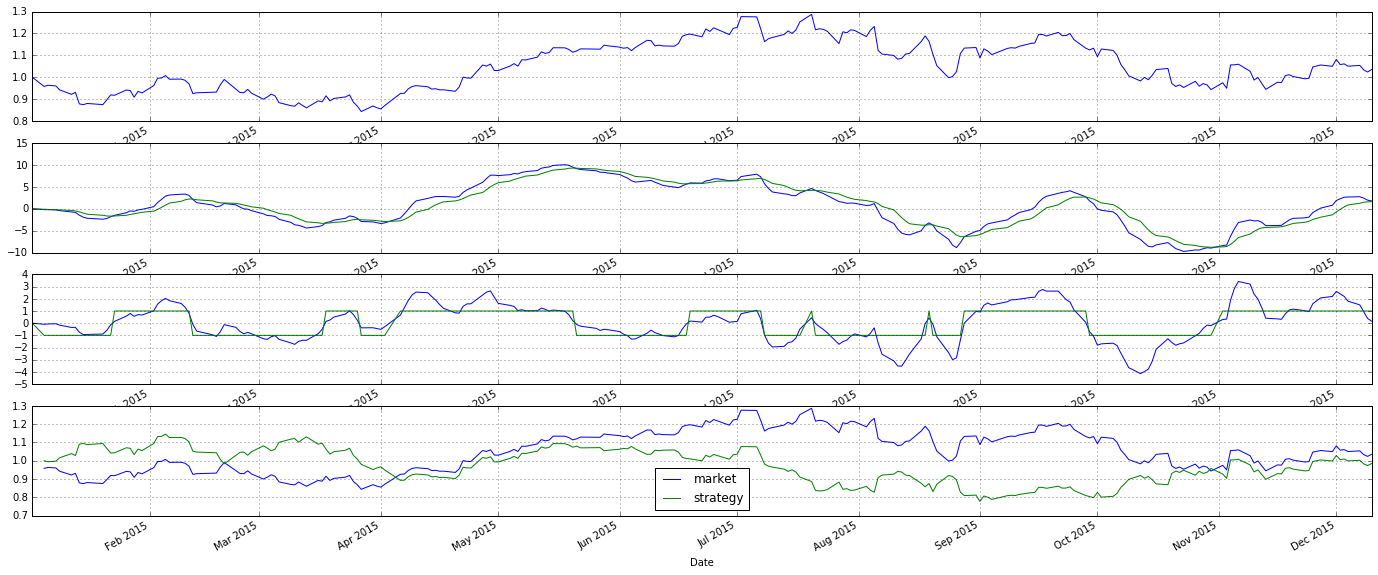

In [53]:
dt = macd('TSLA')
plotMacd(dt)

In [20]:

dt.head()

,Open,High,Low,Close,Volume,Adj Close,CloseN,Date,macd,signal,dmacd,trade
Date,,,,,,,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,4764400,219.309998,1.000000,2015-01-02,0.000000,0.000000,0.000000,0
2015-01-05,214.550003,216.500000,207.160004,210.089996,5368500,210.089996,0.957959,2015-01-05,-0.206859,-0.206859,-0.091937,0
2015-01-06,210.059998,214.199997,204.210007,211.279999,6261900,211.279999,0.963385,2015-01-06,-0.226678,-0.226678,-0.065954,0
2015-01-07,213.350006,214.779999,209.779999,210.949997,2968400,210.949997,0.961880,2015-01-07,-0.242051,-0.242051,-0.053777,0
2015-01-08,212.809998,213.800003,210.009995,210.619995,3442500,210.619995,0.960376,2015-01-08,-0.258440,-0.258440,-0.049294,0


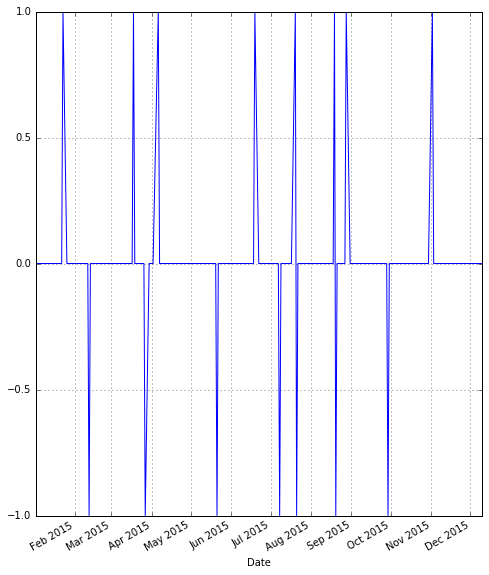

In [24]:
dt['trade'].plot(figsize=(8, 10), grid=True)






In [34]:
print 'signal'
signal.head()


signal


Date
2015-01-02    0.000000
2015-01-05   -0.114922
2015-01-06   -0.160723
2015-01-07   -0.188273
2015-01-08   -0.209146
Name: Close, dtype: float64